# Be in Fashion

MNIST nowadays is considered an "easy" dataset. So, let's use something more challenging... the Fashion MNIST!

2024-10-03 14:16:37.243157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 14:16:37.257619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 14:16:37.261998: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 14:16:37.272615: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-03 14:16:37.944248: W tensorflow/compiler/tf2

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


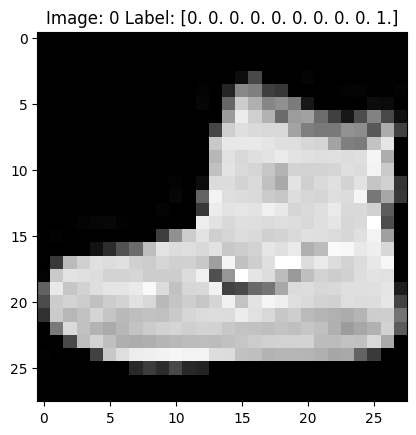

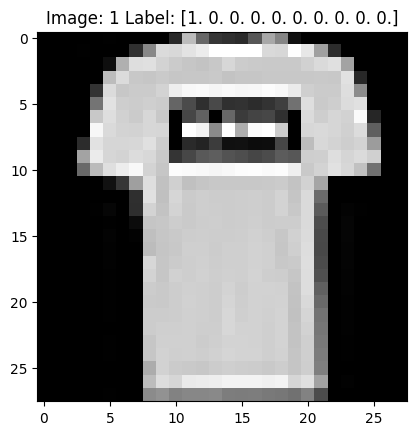

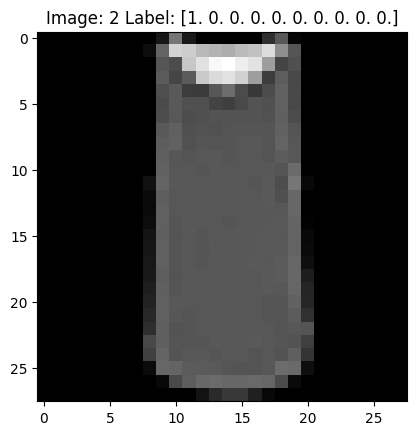

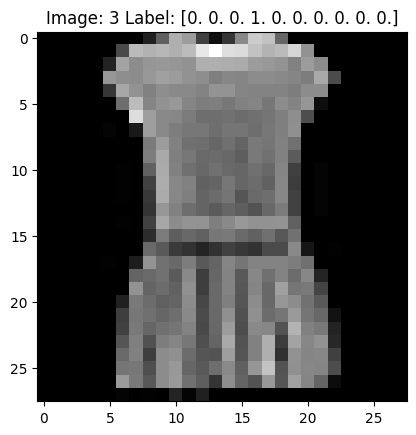

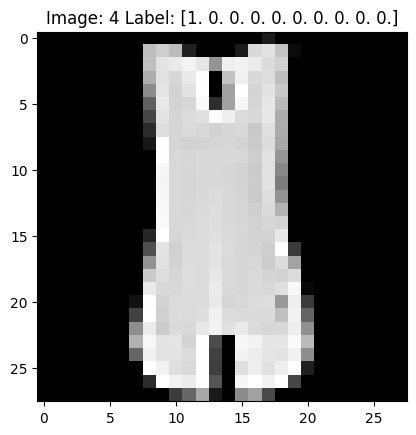

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten, Dropout
from keras.optimizers import Adam
%matplotlib inline


# Prepare the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

for i in range(5):
    plt.figure(i)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title("Image: " + str(i) + " Label: " + str(y_train[i]))



Use the same model as before and examine its performance:

In [2]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))

/home/nick/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1727954205.165066 2356006 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727954205.206365 2356006 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727954205.206520 2356006 cuda_execu

Epoch 1/30


2024-10-03 14:16:46.203707: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-10-03 14:16:46.320834: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
I0000 00:00:1727954207.155499 2356064 service.cc:146] XLA service 0x759d6c005fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727954207.155523 2356064 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-10-03 14:16:47.177237: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-03 14:16:47.291787: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-03 14:16:47.323825: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA 

235/235 - 8s - 36ms/step - accuracy: 0.7984 - loss: 0.5550 - val_accuracy: 0.8499 - val_loss: 0.4174
Epoch 2/30
235/235 - 1s - 4ms/step - accuracy: 0.8771 - loss: 0.3424 - val_accuracy: 0.8786 - val_loss: 0.3361
Epoch 3/30
235/235 - 1s - 4ms/step - accuracy: 0.8960 - loss: 0.2886 - val_accuracy: 0.8921 - val_loss: 0.3073
Epoch 4/30
235/235 - 1s - 4ms/step - accuracy: 0.9071 - loss: 0.2541 - val_accuracy: 0.8974 - val_loss: 0.2895
Epoch 5/30
235/235 - 1s - 4ms/step - accuracy: 0.9163 - loss: 0.2300 - val_accuracy: 0.9003 - val_loss: 0.2800
Epoch 6/30
235/235 - 1s - 3ms/step - accuracy: 0.9250 - loss: 0.2063 - val_accuracy: 0.9072 - val_loss: 0.2591
Epoch 7/30
235/235 - 1s - 3ms/step - accuracy: 0.9320 - loss: 0.1859 - val_accuracy: 0.9096 - val_loss: 0.2538
Epoch 8/30
235/235 - 1s - 3ms/step - accuracy: 0.9372 - loss: 0.1701 - val_accuracy: 0.9059 - val_loss: 0.2561
Epoch 9/30
235/235 - 1s - 3ms/step - accuracy: 0.9442 - loss: 0.1518 - val_accuracy: 0.9142 - val_loss: 0.2418
Epoch 10/30

2024-10-03 14:17:22.097109: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-10-03 14:17:22.213957: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9940 - loss: 0.0177
Train error (%):  0.6649971008300781
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9176 - loss: 0.4951
Test error (%):  8.240002393722534


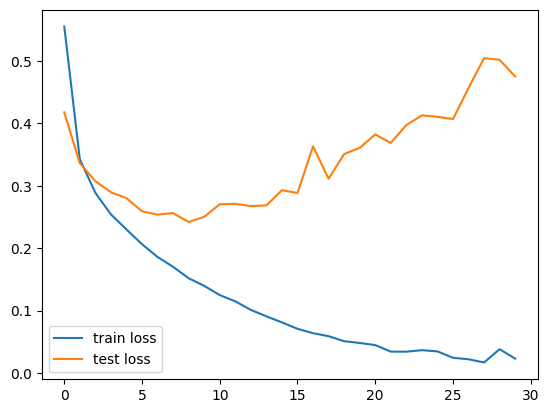

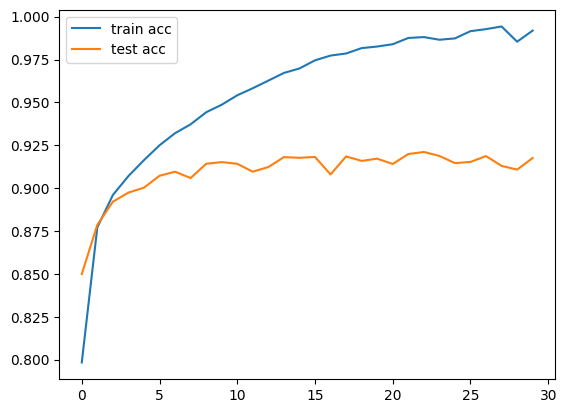

In [3]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train acc', 'test acc'])

print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

The model now seems to overfit the data. So, it is time to use a regularization technique!

In [4]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))

Epoch 1/30


2024-10-03 14:17:32.615626: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 - 7s - 30ms/step - accuracy: 0.7587 - loss: 0.6532 - val_accuracy: 0.8540 - val_loss: 0.4142
Epoch 2/30
235/235 - 1s - 4ms/step - accuracy: 0.8496 - loss: 0.4131 - val_accuracy: 0.8759 - val_loss: 0.3436
Epoch 3/30
235/235 - 1s - 4ms/step - accuracy: 0.8694 - loss: 0.3573 - val_accuracy: 0.8872 - val_loss: 0.3187
Epoch 4/30
235/235 - 1s - 4ms/step - accuracy: 0.8786 - loss: 0.3321 - val_accuracy: 0.8866 - val_loss: 0.3105
Epoch 5/30
235/235 - 1s - 4ms/step - accuracy: 0.8848 - loss: 0.3125 - val_accuracy: 0.8966 - val_loss: 0.2850
Epoch 6/30
235/235 - 1s - 4ms/step - accuracy: 0.8912 - loss: 0.2944 - val_accuracy: 0.9006 - val_loss: 0.2723
Epoch 7/30
235/235 - 1s - 4ms/step - accuracy: 0.8939 - loss: 0.2887 - val_accuracy: 0.8923 - val_loss: 0.2898
Epoch 8/30
235/235 - 1s - 4ms/step - accuracy: 0.8978 - loss: 0.2760 - val_accuracy: 0.8996 - val_loss: 0.2636
Epoch 9/30
235/235 - 1s - 4ms/step - accuracy: 0.9012 - loss: 0.2682 - val_accuracy: 0.9046 - val_loss: 0.2501
Epoch 10/30

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9635 - loss: 0.1122
Train error (%):  3.776669502258301
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9228 - loss: 0.2154
Test error (%):  7.690000534057617


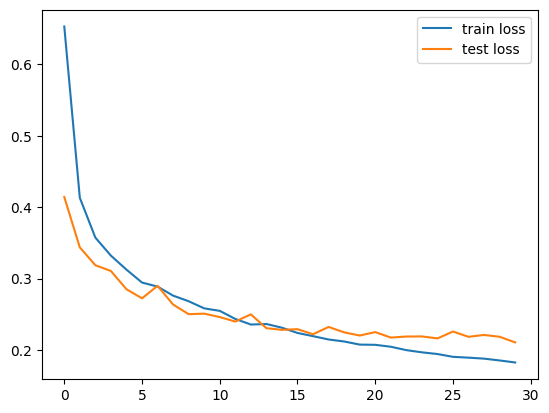

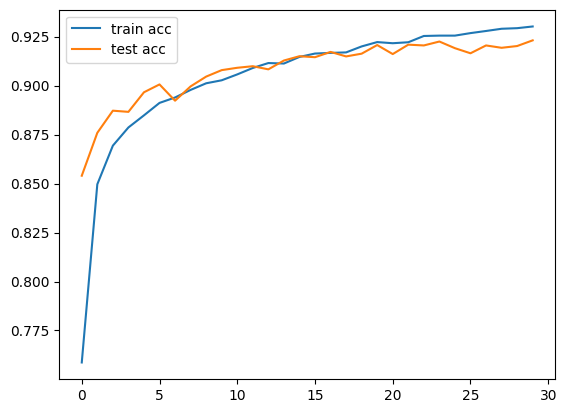

In [5]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train acc', 'test acc'])

print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

It helps a bit! But, the model now seems to have the opposite problem, it cannot model the data well enough. So ... add more layers!

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))

Epoch 1/30


2024-10-03 14:18:30.985990: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 560.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


235/235 - 12s - 52ms/step - accuracy: 0.7507 - loss: 0.6690 - val_accuracy: 0.8436 - val_loss: 0.4206
Epoch 2/30
235/235 - 1s - 6ms/step - accuracy: 0.8538 - loss: 0.3935 - val_accuracy: 0.8815 - val_loss: 0.3206
Epoch 3/30
235/235 - 2s - 7ms/step - accuracy: 0.8801 - loss: 0.3262 - val_accuracy: 0.8984 - val_loss: 0.2758
Epoch 4/30
235/235 - 2s - 7ms/step - accuracy: 0.8912 - loss: 0.2944 - val_accuracy: 0.9028 - val_loss: 0.2617
Epoch 5/30
235/235 - 1s - 6ms/step - accuracy: 0.9017 - loss: 0.2687 - val_accuracy: 0.9129 - val_loss: 0.2436
Epoch 6/30
235/235 - 1s - 6ms/step - accuracy: 0.9074 - loss: 0.2522 - val_accuracy: 0.9091 - val_loss: 0.2408
Epoch 7/30
235/235 - 1s - 6ms/step - accuracy: 0.9132 - loss: 0.2380 - val_accuracy: 0.9144 - val_loss: 0.2283
Epoch 8/30
235/235 - 1s - 6ms/step - accuracy: 0.9158 - loss: 0.2266 - val_accuracy: 0.9176 - val_loss: 0.2229
Epoch 9/30
235/235 - 1s - 6ms/step - accuracy: 0.9186 - loss: 0.2178 - val_accuracy: 0.9165 - val_loss: 0.2236
Epoch 10/3

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9825 - loss: 0.0530
Train error (%):  1.8166661262512207
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9363 - loss: 0.2066
Test error (%):  6.400001049041748


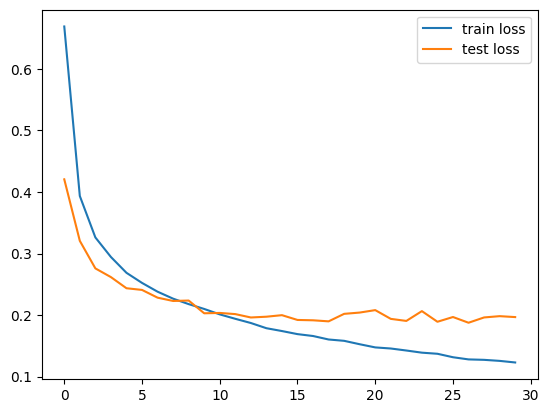

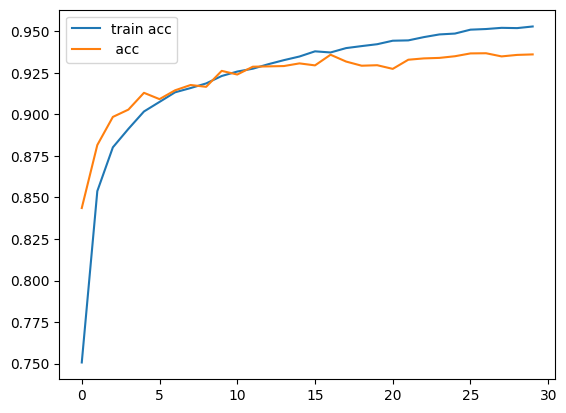

In [7]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train acc', ' acc'])

print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

Other things to consider:

1.  Learning rate scheduling (implemented as keras callback)
2.  Using data augmentation (keras also natively supports data augmentation)
3.  Using batch normalization
3.  Selecting the best optimizer (Adam, RMSProp, SGD+Momentum, ...)

1+2 are especially important for more challenging datasets!!

